# Lab 4-2: Load Data

## Slicing 1D Array

In [2]:
nums = [0, 1, 2, 3, 4]

In [2]:
print(nums)

[0, 1, 2, 3, 4]


From index 2 to 4 (including front, excluding back)

In [4]:
print(nums[2:4])

[2, 3]


From index 2 to end.

In [5]:
print(nums[2:])

[2, 3, 4]


From the beginning to index 2 (again, the last is not included)

In [4]:
print(nums[:2])

[0, 1]


All items

In [7]:
print(nums[:])

[0, 1, 2, 3, 4]


From the beginning to the last index (again, not including the last one)

In [8]:
print(nums[:-1])

[0, 1, 2, 3]


Assigning is also possible

In [9]:
nums[2:4] = [8, 9]

In [10]:
print(nums)

[0, 1, 8, 9, 4]


## Slicing 2D Array

In [1]:
import numpy as np

In [2]:
b = np.array([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]])

In [3]:
print(b)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


In [4]:
b[:, 1]

array([ 2,  6, 10])

In [5]:
b[-1]

array([ 9, 10, 11, 12])

In [16]:
b[-1, :]

array([ 9, 10, 11, 12])

In [6]:
b[-1, ...]

array([ 9, 10, 11, 12])

> `...` means select all elements along the remaining axes

In [7]:
b[0:2, :]

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

## Loading Data from `.csv` file

In [8]:
import numpy as np

In [12]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)

In [10]:
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

In [11]:
print(x_data.shape) # x_data shape
print(len(x_data))  # x_data length
print(x_data[:5])   # x_data 5 rows

(25, 3)
25
[[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]]


In [23]:
print(y_data.shape)
print(len(y_data))
print(y_data[:5])

(25, 1)
25
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]]


## Imports

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [14]:
# For reproducibility
torch.manual_seed(1)

## Low-level Implementation

Epoch    0/20 W: [[0.2615159749984741], [0.26294398307800293], [0.2693415582180023]] b: 0.003241 Cost: 26811.960938
Epoch    2/20 W: [[0.5171381235122681], [0.5199505686759949], [0.5328717231750488]] b: 0.006409 Cost: 3675.298096
Epoch    4/20 W: [[0.6115463376045227], [0.6148561835289001], [0.630519688129425]] b: 0.007580 Cost: 512.542419
Epoch    6/20 W: [[0.6463494300842285], [0.6498287916183472], [0.6668362617492676]] b: 0.008013 Cost: 80.190964
Epoch    8/20 W: [[0.6591148972511292], [0.6626425385475159], [0.680476725101471]] b: 0.008172 Cost: 21.081341
Epoch   10/20 W: [[0.6637325286865234], [0.6672636866569519], [0.6857330203056335]] b: 0.008231 Cost: 12.993664
Epoch   12/20 W: [[0.6653376817703247], [0.6688559651374817], [0.6878893375396729]] b: 0.008252 Cost: 11.880537
Epoch   14/20 W: [[0.6658291220664978], [0.669328510761261], [0.6888992786407471]] b: 0.008259 Cost: 11.720860
Epoch   16/20 W: [[0.6659088134765625], [0.66938716173172], [0.6894852519035339]] b: 0.008261 Cost: 

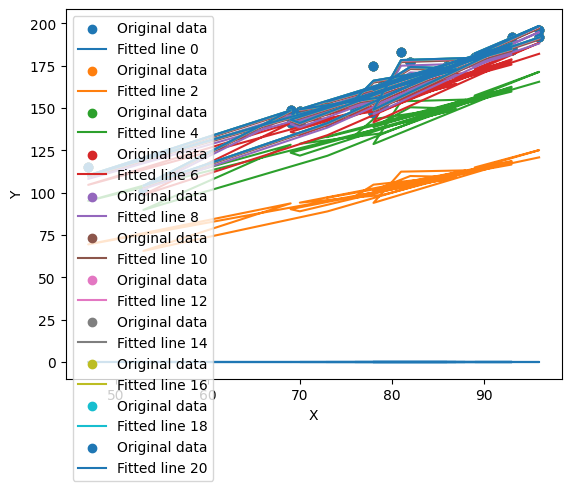

In [34]:
# data is from previous cell which was read from csv
x_train = torch.FloatTensor(x_data) #numpy array to tensor
y_train = torch.FloatTensor(y_data)

W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):

    hypothesis = x_train.matmul(W) + b # or .mm or @

    cost = torch.mean((hypothesis - y_train) ** 2)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % (nb_epochs//10) == 0:
        print('Epoch {:4d}/{} W: {} b: {:.6f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.tolist(), b.item(), cost.item()
        ))
        import matplotlib.pyplot as plt

        # Plotting the data
        plt.scatter(x_data[:, 0], y_data, label='Original data')
        plt.plot(x_data[:, 0], hypothesis.detach().numpy(), label='Fitted line '+str(epoch))
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.legend()

## High-level Implementation with `nn.Module`

In [29]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1)

    def forward(self, x):
        return self.linear(x)

In [33]:
# 데이터
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 28388.000000
Epoch    1/20 Cost: 10504.286133
Epoch    2/20 Cost: 3892.179688
Epoch    3/20 Cost: 1447.497314
Epoch    4/20 Cost: 543.628357
Epoch    5/20 Cost: 209.440048
Epoch    6/20 Cost: 85.878799
Epoch    7/20 Cost: 40.191814
Epoch    8/20 Cost: 23.297268
Epoch    9/20 Cost: 17.048059
Epoch   10/20 Cost: 14.734761
Epoch   11/20 Cost: 13.876624
Epoch   12/20 Cost: 13.556563
Epoch   13/20 Cost: 13.435411
Epoch   14/20 Cost: 13.387821
Epoch   15/20 Cost: 13.367404
Epoch   16/20 Cost: 13.357059
Epoch   17/20 Cost: 13.350419
Epoch   18/20 Cost: 13.345175
Epoch   19/20 Cost: 13.340427
Epoch   20/20 Cost: 13.335882


## Dataset and DataLoader

<div class="alert alert-warning">
    Need basic knowledge of pandas
</div>

If the data is too large, do not import all `x_data` and `y_data`, only the required deployment can be imported.

[PyTorch Data Loading and Processing tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html#iterating-through-the-dataset)